## DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
orders_df = pd.read_csv("data/Orders.csv")
campaign_data_df = pd.read_csv('data/Campaign_data.csv')
intern_study_df = pd.read_csv('data/Intern_study.csv')
order_process_df = pd.read_csv('data/Order_process.csv')

In [3]:
# replace characters
cols1 = orders_df.columns.tolist()
cols1 = [col.replace(' ', '_') for col in cols1]
orders_df.columns = cols1
cols2 = campaign_data_df.columns.tolist()
cols2 = [col.replace(' ', '_') for col in cols2]
campaign_data_df.columns = cols2
cols3 = order_process_df.columns.tolist()
cols3 = [col.replace(' ', '_') for col in cols3]
order_process_df.columns = cols3
cols4 = intern_study_df.columns.tolist()
cols4 = [col.replace(' ', '_') for col in cols4]
intern_study_df.columns = cols4

In [4]:
display(#intern_study_df.info(),
        campaign_data_df.info(),
        order_process_df.info(),
        orders_df.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order_ID           333 non-null    object
 1   Arrival_Scan_Date  333 non-null    object
 2   Customer_Name      333 non-null    object
dtypes: object(3)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Row_ID              5899 non-null   int64 
 1   Order_ID            5899 non-null   object
 2   Order_Date          5899 non-null   object
 3   On_Truck_Scan_Date  5899 non-null   object
 4   Ship_Mode           5899 non-null   object
dtypes: int64(1), object(4)
memory usage: 230.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         

None

None

None

In [5]:
# make column names lowercase
intern_study_df.columns = intern_study_df.columns.str.lower()  
campaign_data_df.columns = campaign_data_df.columns.str.lower()
order_process_df.columns = order_process_df.columns.str.lower()
orders_df.columns = orders_df.columns.str.lower()

display(campaign_data_df.head(),
        order_process_df.head(),
        orders_df.head()
)

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly


,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing


,index,order_id,order_date,ship_mode_logistics,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


In [6]:
# change date format
intern_study_df['ready_to_ship_date'] = pd.to_datetime(intern_study_df['ready_to_ship_date'], format="%d/%m/%Y")
intern_study_df['pickup_date'] = pd.to_datetime(intern_study_df['pickup_date'], format="%d/%m/%Y")
campaign_data_df['arrival_scan_date'] = pd.to_datetime(campaign_data_df['arrival_scan_date'], format="%d/%m/%Y")
order_process_df['order_date'] = pd.to_datetime(order_process_df['order_date'], format="%d/%m/%Y")
order_process_df['on_truck_scan_date'] = pd.to_datetime(order_process_df['on_truck_scan_date'], format="%d/%m/%Y")
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'], format="%d/%m/%Y")

In [7]:
display(campaign_data_df.shape,
        campaign_data_df.head(),
        order_process_df.shape,
        order_process_df.head(),
        orders_df.shape,
        orders_df.head()
)

(333, 3)

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly


(5899, 5)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,2019-01-09,Standard Processing


(9994, 19)

,index,order_id,order_date,ship_mode_logistics,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


### Work on data frame shipping duration

In [8]:
# combine data frames
combined1 = pd.merge(order_process_df, campaign_data_df, how='inner', on='order_id')
display(combined1.head(),
        combined1.info(),
        combined1.nunique()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              668 non-null    int64         
 1   order_id            668 non-null    object        
 2   order_date          668 non-null    datetime64[ns]
 3   on_truck_scan_date  668 non-null    datetime64[ns]
 4   ship_mode           668 non-null    object        
 5   arrival_scan_date   668 non-null    datetime64[ns]
 6   customer_name       668 non-null    object        
dtypes: datetime64[ns](3), int64(1), object(3)
memory usage: 41.8+ KB


,row_id,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,customer_name
0,3235,CA-2019-138933,2019-04-24,2019-04-29,Express,2019-05-03,Jack Lebron
1,7108,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,2019-05-03,Kunst Miller
2,7109,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,2019-05-03,Kunst Miller
3,7110,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,2019-05-03,Kunst Miller
4,7111,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,2019-05-03,Kunst Miller


None

row_id                668
order_id              333
order_date            170
on_truck_scan_date     99
ship_mode               2
arrival_scan_date     104
customer_name         333
dtype: int64

In [9]:
# delete duplicates
combined1.drop_duplicates(subset=['order_id'], inplace=True)
combined1.nunique()

row_id                333
order_id              333
order_date            170
on_truck_scan_date     99
ship_mode               2
arrival_scan_date     104
customer_name         333
dtype: int64

In [10]:
# add column shipping_duration
combined1['shipping_duration']=(combined1["arrival_scan_date"]-combined1["on_truck_scan_date"]).dt.days
combined1['overall_duration']=(combined1["arrival_scan_date"]-combined1["order_date"]).dt.days
combined1.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,customer_name,shipping_duration,overall_duration
0,3235,CA-2019-138933,2019-04-24,2019-04-29,Express,2019-05-03,Jack Lebron,4,9
1,7108,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,2019-05-03,Kunst Miller,4,14
8,1037,CA-2019-113061,2019-04-22,2019-04-29,Standard Processing,2019-05-06,Ed Ludwig,7,14
9,1180,CA-2019-168081,2019-04-24,2019-05-01,Standard Processing,2019-05-06,Cathy Armstrong,5,12
10,332,US-2019-150147,2019-04-25,2019-05-01,Standard Processing,2019-05-07,John Lucas,6,12


In [11]:
# delete columns
combined1.drop(columns='row_id', inplace=True)
combined1.drop(columns='customer_name', inplace=True)
combined1.head()

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,shipping_duration,overall_duration
0,CA-2019-138933,2019-04-24,2019-04-29,Express,2019-05-03,4,9
1,CA-2019-109666,2019-04-19,2019-04-29,Standard Processing,2019-05-03,4,14
8,CA-2019-113061,2019-04-22,2019-04-29,Standard Processing,2019-05-06,7,14
9,CA-2019-168081,2019-04-24,2019-05-01,Standard Processing,2019-05-06,5,12
10,US-2019-150147,2019-04-25,2019-05-01,Standard Processing,2019-05-07,6,12


### Work on data frame shipping duration & ship mode

In [12]:
orders_df.drop(columns='order_date', inplace=True)

In [13]:
# combine data frames
combined2 = pd.merge(orders_df, combined1, how='inner', on='order_id')
display(combined2.head(),
        combined2.info(),
        combined2.nunique()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                668 non-null    int64         
 1   order_id             668 non-null    object        
 2   ship_mode_logistics  668 non-null    object        
 3   customer_id          668 non-null    object        
 4   customer_name        668 non-null    object        
 5   origin_channel       668 non-null    object        
 6   country/region       668 non-null    object        
 7   city                 668 non-null    object        
 8   state                668 non-null    object        
 9   postal_code          668 non-null    float64       
 10  region               668 non-null    object        
 11  category             668 non-null    object        
 12  sub-category         668 non-null    object        
 13  product_id           668 non-null  

,index,order_id,ship_mode_logistics,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,...,sales,quantity,discount,profit,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,shipping_duration,overall_duration
0,252,CA-2019-145625,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,92037.0,...,3347.37,13,0.0,636.0003,2019-09-11,2019-09-18,Standard Processing,2019-09-23,5,12
1,251,CA-2019-145625,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,92037.0,...,7.61,1,0.0,3.5767,2019-09-11,2019-09-18,Standard Processing,2019-09-23,5,12
2,325,CA-2019-162138,Standard Class,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,92345.0,...,99.99,1,0.0,34.9965,2019-04-23,2019-05-01,Standard Processing,2019-05-06,5,13
3,324,CA-2019-162138,Standard Class,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,92345.0,...,251.52,6,0.2,81.7440,2019-04-23,2019-05-01,Standard Processing,2019-05-06,5,13
4,494,CA-2019-169166,Standard Class,SS-20590,Sonia Sunley,Email,United States,Seattle,Washington,98115.0,...,93.98,2,0.0,13.1572,2019-05-09,2019-05-15,Standard Processing,2019-05-20,5,11


None

index                  668
order_id               333
ship_mode_logistics      3
customer_id            333
customer_name          333
origin_channel           3
country/region           1
city                   137
state                   40
postal_code            178
region                   4
category                 3
sub-category            17
product_id             562
sales                  625
quantity                14
discount                11
profit                 636
order_date             170
on_truck_scan_date      99
ship_mode                2
arrival_scan_date      104
shipping_duration        7
overall_duration        15
dtype: int64

In [14]:
combined2.drop_duplicates(subset=['order_id'], inplace=True)
combined2.nunique()
combined2.head()

,index,order_id,ship_mode_logistics,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,...,sales,quantity,discount,profit,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,shipping_duration,overall_duration
0,252,CA-2019-145625,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,92037.0,...,3347.37,13,0.0,636.0003,2019-09-11,2019-09-18,Standard Processing,2019-09-23,5,12
2,325,CA-2019-162138,Standard Class,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,92345.0,...,99.99,1,0.0,34.9965,2019-04-23,2019-05-01,Standard Processing,2019-05-06,5,13
4,494,CA-2019-169166,Standard Class,SS-20590,Sonia Sunley,Email,United States,Seattle,Washington,98115.0,...,93.98,2,0.0,13.1572,2019-05-09,2019-05-15,Standard Processing,2019-05-20,5,11
5,734,CA-2020-131954,Standard Class,DS-13030,Darrin Sayre,Facebook,United States,Seattle,Washington,98115.0,...,179.97,3,0.0,86.3856,2020-01-21,2020-01-29,Standard Processing,2020-02-03,5,13
11,1042,CA-2019-102981,Second Class,MO-17500,Mary O'Rourke,Email,United States,New York City,New York,10035.0,...,31.86,2,0.0,11.1510,2019-09-06,2019-09-11,Standard Processing,2019-09-16,5,10


In [15]:
# delete columns
combined2.drop(columns='index', inplace=True)
combined2.drop(columns='customer_id', inplace=True)
combined2.drop(columns='customer_name', inplace=True)
combined2.drop(columns='origin_channel', inplace=True)
combined2.drop(columns='country/region', inplace=True)
combined2.drop(columns='postal_code', inplace=True)
combined2.drop(columns='sales', inplace=True)
combined2.drop(columns='quantity', inplace=True)
combined2.drop(columns='discount', inplace=True)
combined2.drop(columns='profit', inplace=True)
combined2.drop(columns='ship_mode', inplace=True)
combined2.drop(columns='product_id', inplace=True)
combined2.drop(columns='category', inplace=True)
combined2.drop(columns='sub-category', inplace=True)
combined2.head()

,order_id,ship_mode_logistics,city,state,region,order_date,on_truck_scan_date,arrival_scan_date,shipping_duration,overall_duration
0,CA-2019-145625,Standard Class,San Diego,California,West,2019-09-11,2019-09-18,2019-09-23,5,12
2,CA-2019-162138,Standard Class,Hesperia,California,West,2019-04-23,2019-05-01,2019-05-06,5,13
4,CA-2019-169166,Standard Class,Seattle,Washington,West,2019-05-09,2019-05-15,2019-05-20,5,11
5,CA-2020-131954,Standard Class,Seattle,Washington,West,2020-01-21,2020-01-29,2020-02-03,5,13
11,CA-2019-102981,Second Class,New York City,New York,East,2019-09-06,2019-09-11,2019-09-16,5,10


## EDA

### Duration

In [16]:
display(combined1.describe(),
        combined1['shipping_duration'].mode(),
        combined1['overall_duration'].mode()

)

,shipping_duration,overall_duration
count,333.000000,333.000000
mean,4.603604,10.834835
std,1.199492,2.862257
min,1.000000,3.000000
25%,4.000000,9.000000
50%,5.000000,11.000000
75%,5.000000,13.000000
max,7.000000,17.000000


0    5
Name: shipping_duration, dtype: int64

0    12
Name: overall_duration, dtype: int64

In [17]:
# count overview
display(combined1.groupby('shipping_duration').count(),
        combined1.groupby('overall_duration').count()
)

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,overall_duration
shipping_duration,,,,,,
1,3,3,3,3,3,3
2,17,17,17,17,17,17
3,45,45,45,45,45,45
4,44,44,44,44,44,44
5,179,179,179,179,179,179
6,25,25,25,25,25,25
7,20,20,20,20,20,20


,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,shipping_duration
overall_duration,,,,,,
3,2,2,2,2,2,2
4,8,8,8,8,8,8
5,10,10,10,10,10,10
6,12,12,12,12,12,12
7,16,16,16,16,16,16
8,25,25,25,25,25,25
9,20,20,20,20,20,20
10,30,30,30,30,30,30
11,50,50,50,50,50,50


### Shipping Duration

<AxesSubplot: ylabel='Frequency'>

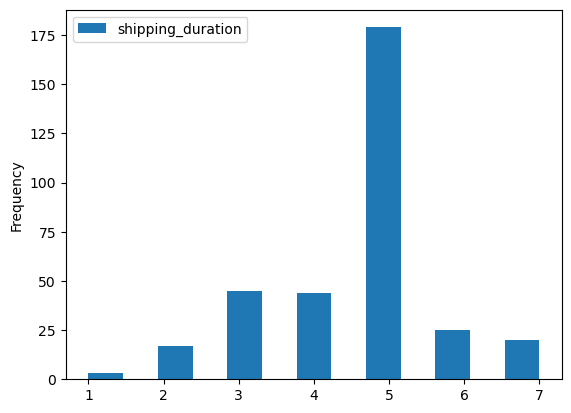

In [18]:
combined1[['shipping_duration']].plot(kind='hist', bins=13)

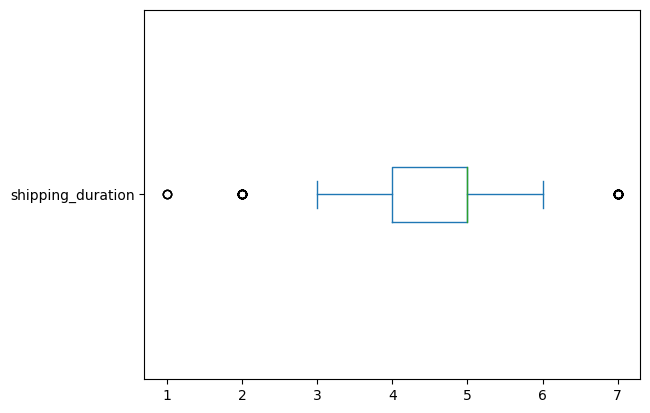

In [19]:
combined1[['shipping_duration']].plot(kind='box', vert = False);

### Overall Duration

<AxesSubplot: ylabel='Frequency'>

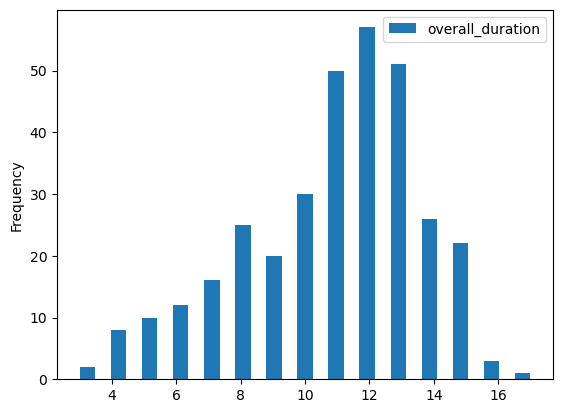

In [20]:
combined1[['overall_duration']].plot(kind='hist', bins=29)

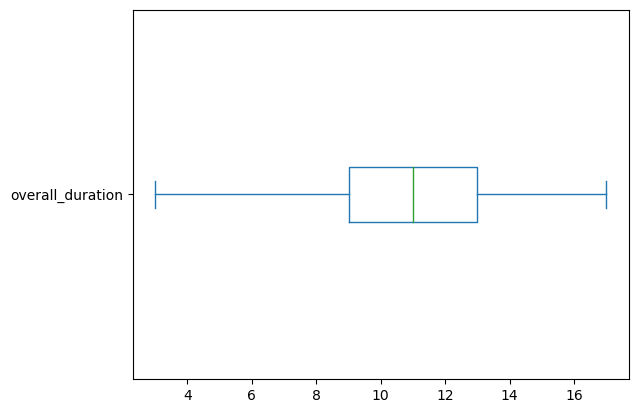

In [21]:
combined1[['overall_duration']].plot(kind='box', vert = False);

### Shipping Mode

In [22]:
combined2.head(10)

,order_id,ship_mode_logistics,city,state,region,order_date,on_truck_scan_date,arrival_scan_date,shipping_duration,overall_duration
0,CA-2019-145625,Standard Class,San Diego,California,West,2019-09-11,2019-09-18,2019-09-23,5,12
2,CA-2019-162138,Standard Class,Hesperia,California,West,2019-04-23,2019-05-01,2019-05-06,5,13
4,CA-2019-169166,Standard Class,Seattle,Washington,West,2019-05-09,2019-05-15,2019-05-20,5,11
5,CA-2020-131954,Standard Class,Seattle,Washington,West,2020-01-21,2020-01-29,2020-02-03,5,13
11,CA-2019-102981,Second Class,New York City,New York,East,2019-09-06,2019-09-11,2019-09-16,5,10
13,CA-2019-168081,Second Class,Houston,Texas,Central,2019-04-24,2019-05-01,2019-05-06,5,12
14,CA-2019-119186,First Class,Fort Worth,Texas,Central,2019-05-26,2019-05-28,2019-05-31,3,5
18,CA-2019-124485,First Class,New York City,New York,East,2019-11-24,2019-11-27,2019-12-02,5,8
22,CA-2020-115994,Second Class,Costa Mesa,California,West,2020-01-28,2020-02-03,2020-02-06,3,9
24,CA-2019-106530,First Class,Cleveland,Ohio,East,2019-05-08,2019-05-08,2019-05-13,5,5


/var/folders/p3/vzhl4nfj4lbfrpbrhv_5cd8r0000gn/T/ipykernel_1805/963437525.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined2.groupby('state').mean()['shipping_duration'].plot(kind='bar', x='state', y='shipping_duration');


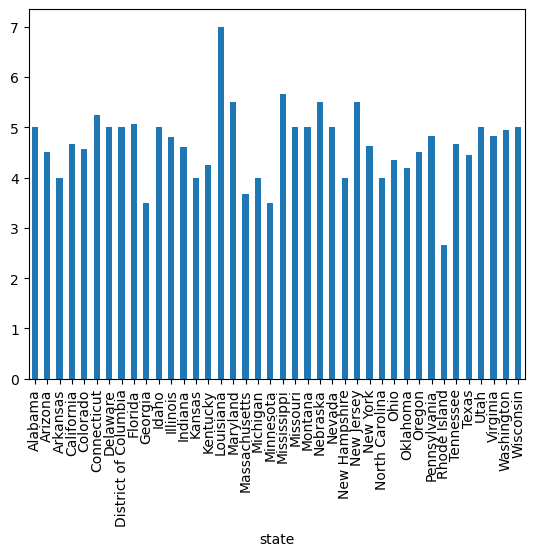

In [23]:
# grouped by state (mean)
combined2.groupby('state').mean()['shipping_duration'].plot(kind='bar', x='state', y='shipping_duration');

/var/folders/p3/vzhl4nfj4lbfrpbrhv_5cd8r0000gn/T/ipykernel_1805/1103434181.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combined2.groupby('ship_mode_logistics').mean()['shipping_duration'].plot(kind='bar', x='ship_mode_logistics', y='shipping_duration');


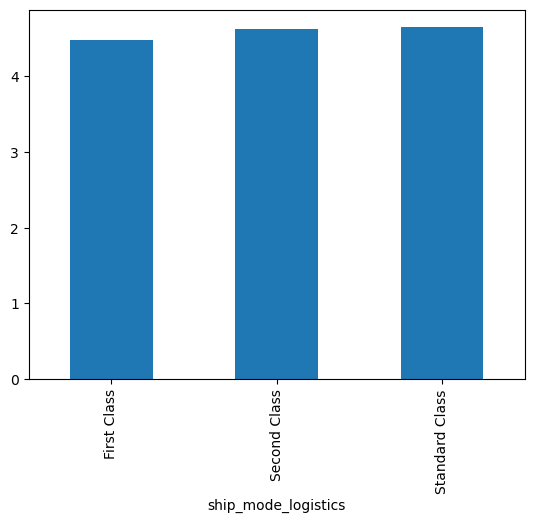

In [25]:
# grouped by ship_mode_logistics (mean)
combined2.groupby('ship_mode_logistics').mean()['shipping_duration'].plot(kind='bar', x='ship_mode_logistics', y='shipping_duration');